# Beispiel: Spektrum der Lufttemperatur-Anomalie

Wir verwenden meteorologische Daten vom Deutschen Wetterdienst, aus welchen wir zuvor Wochenmittelwerte und Anomalien berechnet haben, siehe [Beispiel aus Stunde 3](https://nbviewer.jupyter.org/github/LarsKaleschke/Zeitreihenanalyse/blob/master/stunde3/Pandas-Zeitserien-DWD-Beispieldaten.ipynb)

Fragestellung: Wir gut können die Anomalien durch einen AR1-Prozess repräsentiert werden?

## Python-Version

In [1]:
%pylab inline
import pandas as pd
DF=pd.read_csv('Anomalien.csv',parse_dates=[0])
DF.head()

Populating the interactive namespace from numpy and matplotlib


,Datum,Wochenmittel,Jahresgang,Anomalie
0,1891-01-01,-10.700000,0.881145,-11.581145
1,1891-01-08,-6.485714,0.648434,-7.134148
2,1891-01-15,-4.957143,0.543115,-5.500258
3,1891-01-22,-6.042857,0.566787,-6.609644
4,1891-01-29,1.785714,0.719091,1.066623


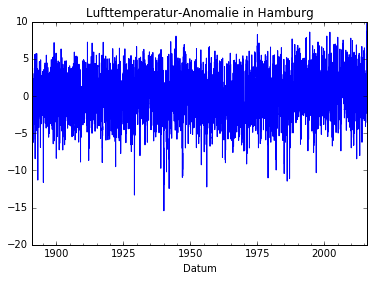

In [2]:
TA=pd.Series(DF['Anomalie'].data,index=DF['Datum'])
TA.plot()
title('Lufttemperatur-Anomalie in Hamburg')

## Korrelogramm

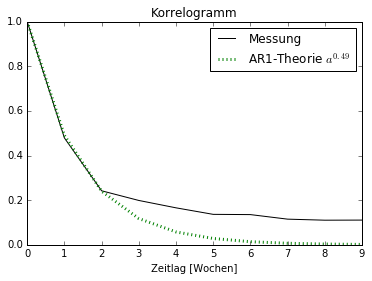

In [3]:
def korrelation(x,y):
    mx=mean(x)
    my=mean(y)
    return sum( (x-mx)*(y-my) )/sqrt(sum( (x-mx)**2)* sum((y-my)**2) )
def autokorrelation(x,l):
    r=ones(l)
    for i in range(1,l):
        x1=x[i:]
        x2=x[:-i]
        r[i]=korrelation(x1,x2)
    return r
L=10
k=arange(0,L)
AK=autokorrelation(TA.data,L)
plot(k,AK,'k-',label='Messung')
a=0.49
plot(k,a**k,'g:',lw=3,label='AR1-Theorie $a^{'+str(a)+'}$')
xlabel('Zeitlag [Wochen]')
title('Korrelogramm')
legend()

## Spektrum

(1.0, 128.0, 1.4151486616128028, 60.782831024320878)

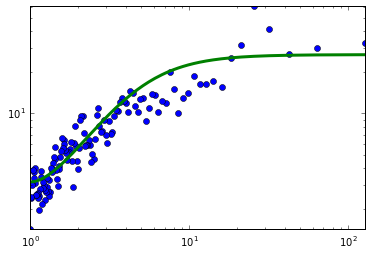

In [5]:
def AR1_Spektrum(a,F,f):
    G=F/(1+a**2-2*a*cos(f*pi))
    return G

figure()
Pxx1,freqs=psd(TA.data)
close()
G1=AR1_Spektrum(0.49,7,freqs)
T=1/freqs
#loglog(freqs,Pxx1,'o')
#loglog(freqs,G1,'-',linewidth=3)
loglog(T,Pxx1,'o')
loglog(T,G1,'-',linewidth=3)

axis('tight')

## Octave Beispiele

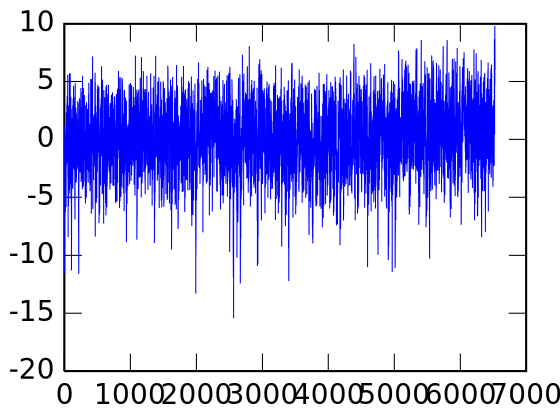

In [2]:
TAB=csvread('Anomalien.csv');
y=transpose(TAB(:,4));
plot(y)

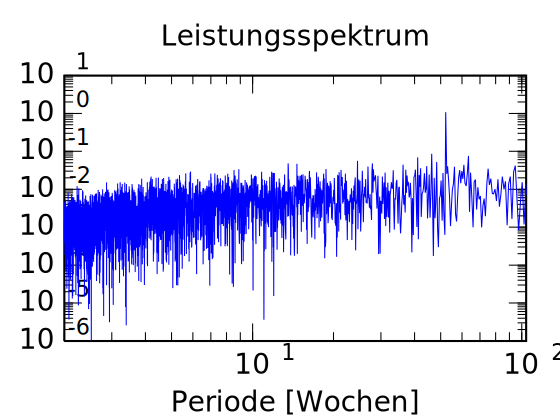

In [3]:
fa = 1.0; % Abtast-Frequenz

Y = fft(y);
N = size(y)(2)/2+1;
X = linspace(0, fa/2, N);

T=1./X;
figure();
Amp=abs(Y(1,1:N)/N);
loglog(T,Amp.^2);

xlabel('Periode [Wochen]');
ylim([1e-6,10]);
xlim([2,104]);
title('Leistungsspektrum')